In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
#corner detection 
img=cv2.imread('object.jpg')
img2=cv2.imread('case.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)
corners=cv2.goodFeaturesToTrack(gray,300,0.01,10)
corners=np.int0(corners)
for corner in corners:
    x,y=corner.ravel()
    cv2.circle(img,(x,y),6,255,6)
gray1=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray1=np.float32(gray1)
corners1=cv2.goodFeaturesToTrack(gray1,300,0.01,10)
corners1=np.int0(corners1)
for corner2 in corners1:
    x,y=corner2.ravel()
    cv2.circle(img2,(x,y),6,255,6)
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(img2)
plt.savefig('vvv.jpg',dpi=1250)

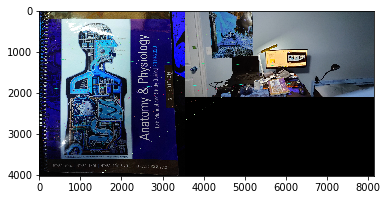

In [2]:
#feature detection 
img2=cv2.imread('case.jpg',1)
img1=cv2.imread('object.jpg',1)
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
matches=sorted(matches, key=lambda x:x.distance)
img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)
plt.imshow(img3)
plt.savefig('vv.jpg',dpi=1200)

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\ROG\\Anaconda3\\Lib\\site-packages\\cv2\data\haarcascade_eye_tree_eyeglasses.xml')
cap = cv2.VideoCapture(0)
while (True):
    bgd=np.zeros((1,65),np.float64)
    fore=np.zeros((1,65),np.float64)
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask=np.zeros(img.shape[:2],np.uint8)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        rect=(x,y,x+w,y+h)
        cv2.grabCut(img,mask,rect,bgd,fore,5,cv2.GC_INIT_WITH_RECT)
        mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
        img=img*mask2[:,:,np.newaxis]
    cv2.imshow('img',img)
    k=cv2.waitKey(30)& 0xff
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()